In [1]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SalaryData_Test.csv')

In [3]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
print('Categorical columns are as follows: ', categorical)

Categorical columns are as follows:  ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [8]:
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [9]:
data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [10]:
#Counts
for var in categorical:
    print(data[var].value_counts())

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-servic

In [11]:
numeric = [var for var in data.columns if data[var].dtype!='O']

In [12]:
print('Numerical columns are as follows:',numeric)

Numerical columns are as follows: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [13]:
data[numeric].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


In [14]:
data[numeric].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [15]:
for var in numeric:
    print(data[var].value_counts())

35    444
33    442
36    431
31    423
38    420
     ... 
88      2
85      2
89      1
84      1
87      1
Name: age, Length: 73, dtype: int64
9     4943
10    3221
13    2526
14     887
11     652
7      571
12     499
6      403
4      266
15     243
5      221
8      200
16     169
3      161
2       71
1       27
Name: educationno, dtype: int64
0        13808
15024      161
7688       121
7298       111
99999       81
         ...  
5060         1
7262         1
2346         1
1173         1
2036         1
Name: capitalgain, Length: 110, dtype: int64
0       14347
1902      100
1977       84
1887       73
2415       23
        ...  
2282        1
1594        1
2163        1
2467        1
1911        1
Name: capitalloss, Length: 79, dtype: int64
40    7107
50    1376
45     849
60     680
35     592
      ... 
76       1
73       1
89       1
69       1
79       1
Name: hoursperweek, Length: 89, dtype: int64


In [16]:
x = data.drop(['Salary'],axis = 1)
y = data['Salary']

In [17]:
x.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [18]:
y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

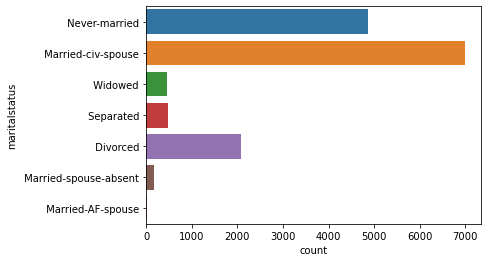

In [19]:
sns.countplot(y='maritalstatus', data = data)

<AxesSubplot:xlabel='count', ylabel='occupation'>

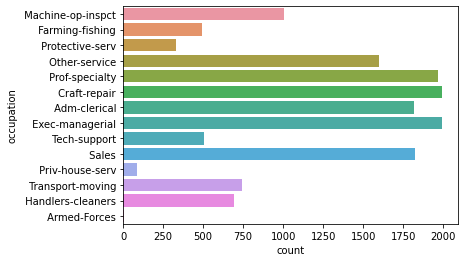

In [20]:
sns.countplot(y='occupation', data = data)

<AxesSubplot:xlabel='count', ylabel='workclass'>

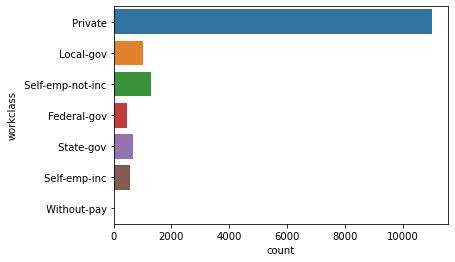

In [21]:
sns.countplot(y='workclass', data = data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

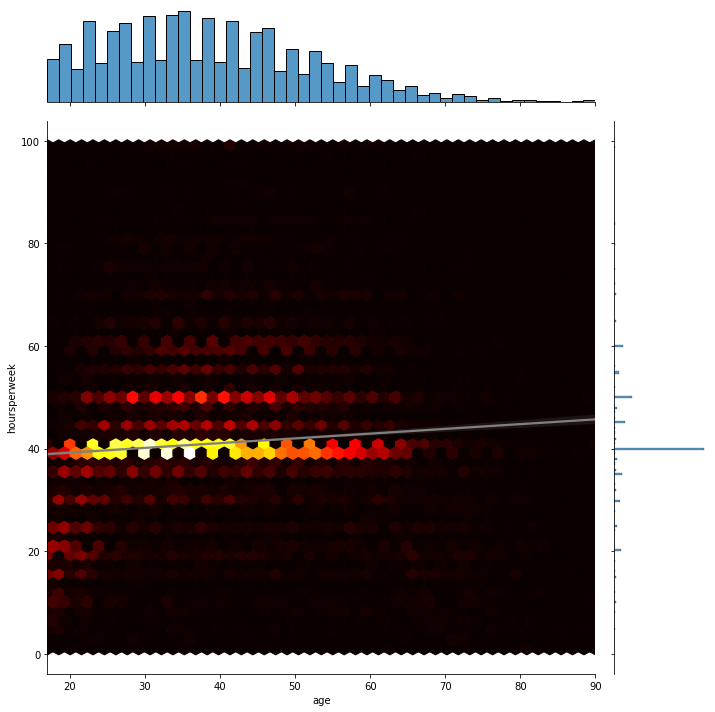

In [22]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(data.age, data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [24]:
x_train.shape, y_train.shape

((10542, 13), (10542,))

In [25]:
x_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [26]:
categorical = [col for col in x_train.columns if x_train[col].dtype=='O']

In [27]:
x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [28]:
x_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [29]:
x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [30]:
x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [31]:
x_train[categorical].head(5)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4324,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2179,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
1906,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,United-States
5206,Private,HS-grad,Divorced,Sales,Not-in-family,White,Female,United-States
4659,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States


In [32]:
! pip install category_encoders

In [33]:
import category_encoders as ce

In [34]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
                                 'race', 'sex', 'native'])

In [35]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4324,41,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2179,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1906,65,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5206,63,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4659,23,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4269,37,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8418,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10064,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3305,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x_train.columns

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'education_1',
       'education_2',
       ...
       'native_31', 'native_32', 'native_33', 'native_34', 'native_35',
       'native_36', 'native_37', 'native_38', 'native_39', 'native_40'],
      dtype='object', length=102)

In [39]:
cols = x_train.columns

In [40]:
from sklearn.preprocessing import RobustScaler
scaler =  RobustScaler()


In [41]:
x_train = scaler.fit_transform(x_train)

In [42]:
x_test = scaler.transform(x_test)

In [43]:
#Converting into DF's
x_train = pd.DataFrame(x_train, columns = [cols])

In [44]:
x_test = pd.DataFrame(x_test, columns = [cols])

In [45]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

In [46]:
gnb.fit(x_train,y_train)

GaussianNB()

In [47]:
y_pred = gnb.predict(x_test)

In [48]:
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [49]:
from sklearn.metrics import accuracy_score
print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy: 0.8028


In [50]:
y_pred_train = gnb.predict(x_train)

In [51]:
y_pred_train

array([' >50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [52]:
print('Training set accuracy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training set accuracy: 0.8017


In [53]:
print('Training set score: {0:0.4f}'.format(gnb.score(x_train, y_train)))

Training set score: 0.8017


In [54]:
print('Test set score:{0:0.4f}'.format(gnb.score(x_test, y_test)))

Test set score:0.8028


In [55]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
print('Confusion Matrix\n', cm)
print('\nTrue Positive = ', cm[0,0])
print('\nTrue Negative = ', cm[1,1])
print('\nFalse Positive = ', cm[0,1])
print('\nFalse Negative = ', cm[1,0])

Confusion Matrix
 [[2709  676]
 [ 215  918]]

True Positive =  2709

True Negative =  918

False Positive =  676

False Negative =  215


In [58]:
#Classification Report
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      3385
        >50K       0.58      0.81      0.67      1133

    accuracy                           0.80      4518
   macro avg       0.75      0.81      0.77      4518
weighted avg       0.84      0.80      0.81      4518



In [60]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [61]:
classification_accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Classification accuracy: ', classification_accuracy)

Classification accuracy:  0.8027888446215139


In [62]:
precision = TP/(TP+FP)
print('Precision: ', precision)

Precision:  0.8002954209748893


In [63]:
recall = TP/(TP+FN)
print('Recall: ', recall)

Recall:  0.9264705882352942


In [64]:
y_pred_prob = gnb.predict_proba(x_test)[0:10]
y_pred_prob

array([[3.48154770e-02, 9.65184523e-01],
       [9.99971965e-01, 2.80346728e-05],
       [9.58220760e-01, 4.17792398e-02],
       [9.99998598e-01, 1.40217160e-06],
       [7.44380787e-02, 9.25561921e-01],
       [9.99011204e-01, 9.88795606e-04],
       [9.99999974e-01, 2.63003814e-08],
       [9.99999999e-01, 9.51848857e-10],
       [2.69689128e-01, 7.30310872e-01],
       [8.01706993e-09, 9.99999992e-01]])

In [65]:
y_pred_prob_data= pd.DataFrame(data=y_pred_prob, columns=['Probability <50K', 'Probability >50K'])
y_pred_prob_data

,Probability <50K,Probability >50K
0,3.481548e-02,9.651845e-01
1,9.999720e-01,2.803467e-05
2,9.582208e-01,4.177924e-02
3,9.999986e-01,1.402172e-06
4,7.443808e-02,9.255619e-01
5,9.990112e-01,9.887956e-04
6,1.000000e+00,2.630038e-08
7,1.000000e+00,9.518489e-10
8,2.696891e-01,7.303109e-01
9,8.017070e-09,1.000000e+00


In [66]:
y_pred1 = gnb.predict_proba(x_test)[:, 1]
y_pred1

array([9.65184523e-01, 2.80346728e-05, 4.17792398e-02, ...,
       5.82472551e-02, 9.99948170e-01, 6.40245003e-07])

Text(0, 0.5, 'Frequency')

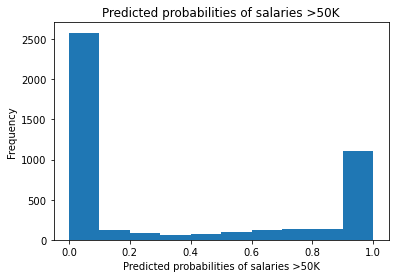

In [67]:
import matplotlib.pyplot as plt
plt.hist(y_pred1, bins = 10)
plt.title('Predicted probabilities of salaries >50K')
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [68]:
#High accuracy(0.8)